# What is the rate of gun violence in District 4? How does this compare to the rest of the city?


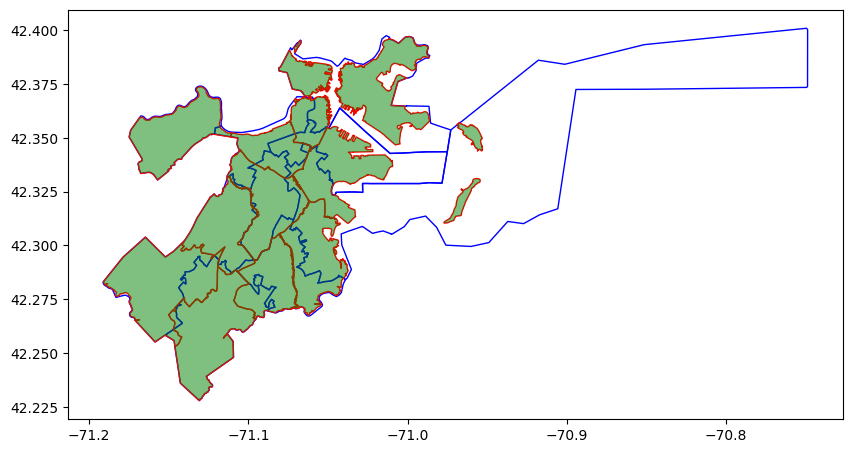

In [59]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefiles
city_council = gpd.read_file('City_Council_Districts_-_Effective_for_the_2023_Municipal_Election/City_Council_Districts_-_Effective_for_the_2023_Municipal_Election.shp')
BPD = gpd.read_file('Police_Districts/Police_Districts.shp')

# Overlay the two shapefiles
overlay = gpd.overlay(city_council, BPD, how='intersection')

# Plot the result
fig, ax = plt.subplots(figsize=(10, 10))
city_council .plot(ax=ax, facecolor='none', edgecolor='blue')
BPD.plot(ax=ax, facecolor='none', edgecolor='red')
overlay.plot(ax=ax, facecolor='green', alpha = 0.5)
plt.show()


In [48]:
shooting_incident = df[df['SHOOTING'] == 1]
shooting_incident

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
34,192000011,3114,NaN,INVESTIGATE PROPERTY,C11,345,1,2019-01-01 00:30:00,2019,1,Tuesday,0,NaN,LONGFELLOW ST,42.302698,-71.066015,"(42.30269786, -71.06601484)"
72,192000030,1402,NaN,VANDALISM,E18,478,1,2019-01-01 02:04:11,2019,1,Tuesday,2,NaN,MARIPOSA ST,42.268818,-71.106519,"(42.26881757, -71.1065192)"
248,192000225,3114,NaN,INVESTIGATE PROPERTY,B2,297,1,2019-01-01 17:10:00,2019,1,Tuesday,17,NaN,KENSINGTON PARK,42.321713,-71.082608,"(42.32171337, -71.08260826)"
321,192000312,423,NaN,ASSAULT - AGGRAVATED,B2,262,1,2019-01-02 01:05:00,2019,1,Wednesday,1,NaN,BROOK AVE,42.321815,-71.074058,"(42.32181505, -71.07405838)"
494,192000560,3114,NaN,INVESTIGATE PROPERTY,C11,245,1,2019-01-02 22:15:00,2019,1,Wednesday,22,NaN,SYDNEY ST,42.318105,-71.052580,"(42.31810456, -71.05258008)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8202,232011624,2662,NaN,BALLISTICS EVIDENCE/FOUND,B3,,1,2023-02-12 19:48:00+00,2023,2,Sunday,19,NaN,AMERICAN LEGION HWY,42.297088,-71.090955,"(42.2970882854075, -71.09095545824248)"
8230,232011907,111,NaN,"MURDER, NON-NEGLIGENT MANSLAUGHTER",B2,,1,2023-02-13 00:00:00+00,2023,2,Monday,0,NaN,DEWEY ST,42.316767,-71.077141,"(42.316766910073476, -71.07714053853037)"
8426,232011954,3114,NaN,INVESTIGATE PROPERTY,B3,,1,2023-02-14 01:54:00+00,2023,2,Tuesday,1,NaN,FAIRMOUNT ST,42.279303,-71.079288,"(42.27930268969712, -71.07928813371267)"
8449,232011974,3115,NaN,INVESTIGATE PERSON,B2,261,1,2023-02-14 08:54:00+00,2023,2,Tuesday,8,NaN,DUDLEY ST,42.320470,-71.071620,"(42.3204697921145, -71.071619500622)"


<Axes: xlabel='Long', ylabel='Lat'>

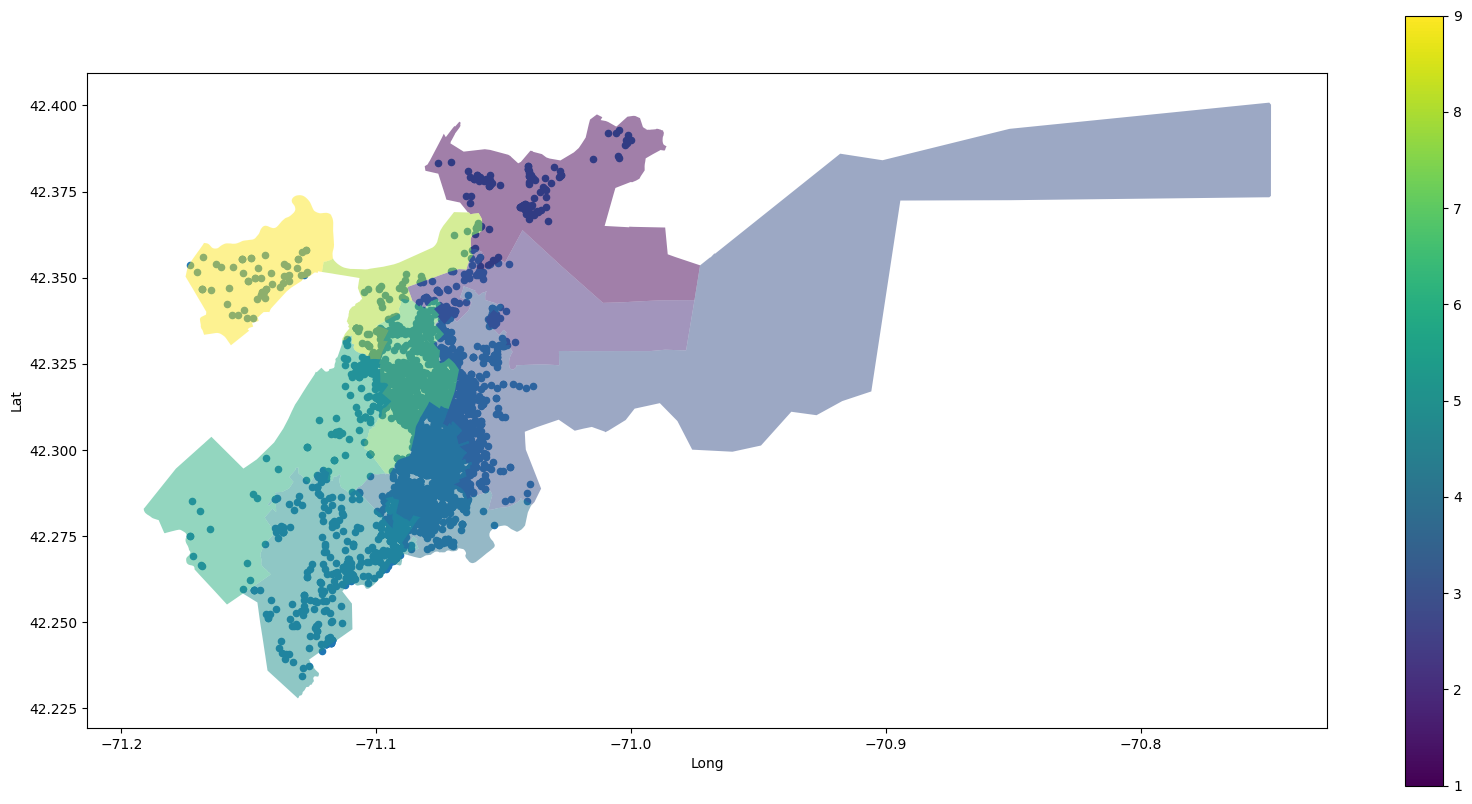

In [49]:
ax = shooting_incident.plot(x="Long", y="Lat", kind="scatter",
        figsize=(20, 10))
city_council.plot(ax = ax, column = 'DISTRICT', legend = True, figsize=(20, 10), alpha = 0.5)


In [75]:
district_4 = city_council[city_council['FID'] == 4]

In [56]:
from turfpy.measurement import boolean_point_in_polygon
from geojson import Point, Polygon, Feature

shooting_incident['point'] = [Point(xy) for xy in zip(shooting_incident.Long, shooting_incident.Lat)] 

district_4.iloc[0]['geometry'].geom_type
geometry = gpd.GeoSeries([district_4.iloc[0]['geometry']]).__geo_interface__
features = geometry['features']
polygon = Polygon(features[0]['geometry']['coordinates'])

shooting_incident['district_4'] = [boolean_point_in_polygon(shooting_incident.iloc[i]['point'], polygon) for i in range(len(shooting_incident))]

/var/folders/3s/4bvxjynd2_s4dkh__461f5hr0000gn/T/ipykernel_64926/1088657021.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_incident['point'] = [Point(xy) for xy in zip(shooting_incident.Long, shooting_incident.Lat)]
/var/folders/3s/4bvxjynd2_s4dkh__461f5hr0000gn/T/ipykernel_64926/1088657021.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shooting_incident['district_4'] = [boolean_point_in_polygon(shooting_incident.iloc[i]['point'], polygon) for i in range(len(shooting_incident))]


In [57]:
shooting_incident_4 = shooting_incident[shooting_incident['district_4'] == True]
shooting_incident_4

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,point,district_4
770,192000890,3114,NaN,INVESTIGATE PROPERTY,B3,439,1,2019-01-04 03:50:00,2019,1,Friday,3,NaN,BLUE HILL AVE,42.290561,-71.089260,"(42.29056131, -71.08926032)","{'type': 'Point', 'coordinates': [-71.08926, 4...",True
1255,192001459,3114,NaN,INVESTIGATE PROPERTY,C11,336,1,2019-01-06 03:16:00,2019,1,Sunday,3,NaN,EUNICE ST,42.304738,-71.070258,"(42.30473813, -71.07025782)","{'type': 'Point', 'coordinates': [-71.070258, ...",True
2540,192003016,413,NaN,ASSAULT - AGGRAVATED - BATTERY,C11,344,1,2019-01-11 19:31:00,2019,1,Friday,19,NaN,CORONA ST,42.301462,-71.068960,"(42.30146187, -71.06895964)","{'type': 'Point', 'coordinates': [-71.06896, 4...",True
2605,192003087,2662,NaN,BALLISTICS EVIDENCE/FOUND,C11,362,1,2019-01-12 02:31:00,2019,1,Saturday,2,NaN,MOULTRIE ST,42.291285,-71.070339,"(42.29128483, -71.07033894)","{'type': 'Point', 'coordinates': [-71.070339, ...",True
2988,192003523,2662,NaN,BALLISTICS EVIDENCE/FOUND,B3,429,1,2019-01-13 22:07:00,2019,1,Sunday,22,NaN,LUCERNE ST,42.284727,-71.089220,"(42.28472661, -71.08921977)","{'type': 'Point', 'coordinates': [-71.08922, 4...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7213,232010222,3114,NaN,INVESTIGATE PROPERTY,B3,,1,2023-02-07 20:55:00+00,2023,2,Tuesday,20,NaN,GREENOCK ST,42.290424,-71.090491,"(42.29042449676464, -71.09049092442505)","{'type': 'Point', 'coordinates': [-71.090491, ...",True
7253,232010259,3114,NaN,INVESTIGATE PROPERTY,B3,,1,2023-02-08 02:04:00+00,2023,2,Wednesday,2,NaN,BLUE HILL AVE,42.288633,-71.089904,"(42.28863337036608, -71.08990387801343)","{'type': 'Point', 'coordinates': [-71.089904, ...",True
8032,232011364,3114,NaN,INVESTIGATE PROPERTY,B3,,1,2023-02-11 17:57:00+00,2023,2,Saturday,17,NaN,WILLOWWOOD ST,42.285190,-71.086366,"(42.28518955028397, -71.08636593667929)","{'type': 'Point', 'coordinates': [-71.086366, ...",True
8202,232011624,2662,NaN,BALLISTICS EVIDENCE/FOUND,B3,,1,2023-02-12 19:48:00+00,2023,2,Sunday,19,NaN,AMERICAN LEGION HWY,42.297088,-71.090955,"(42.2970882854075, -71.09095545824248)","{'type': 'Point', 'coordinates': [-71.090955, ...",True


<Axes: xlabel='Long', ylabel='Lat'>

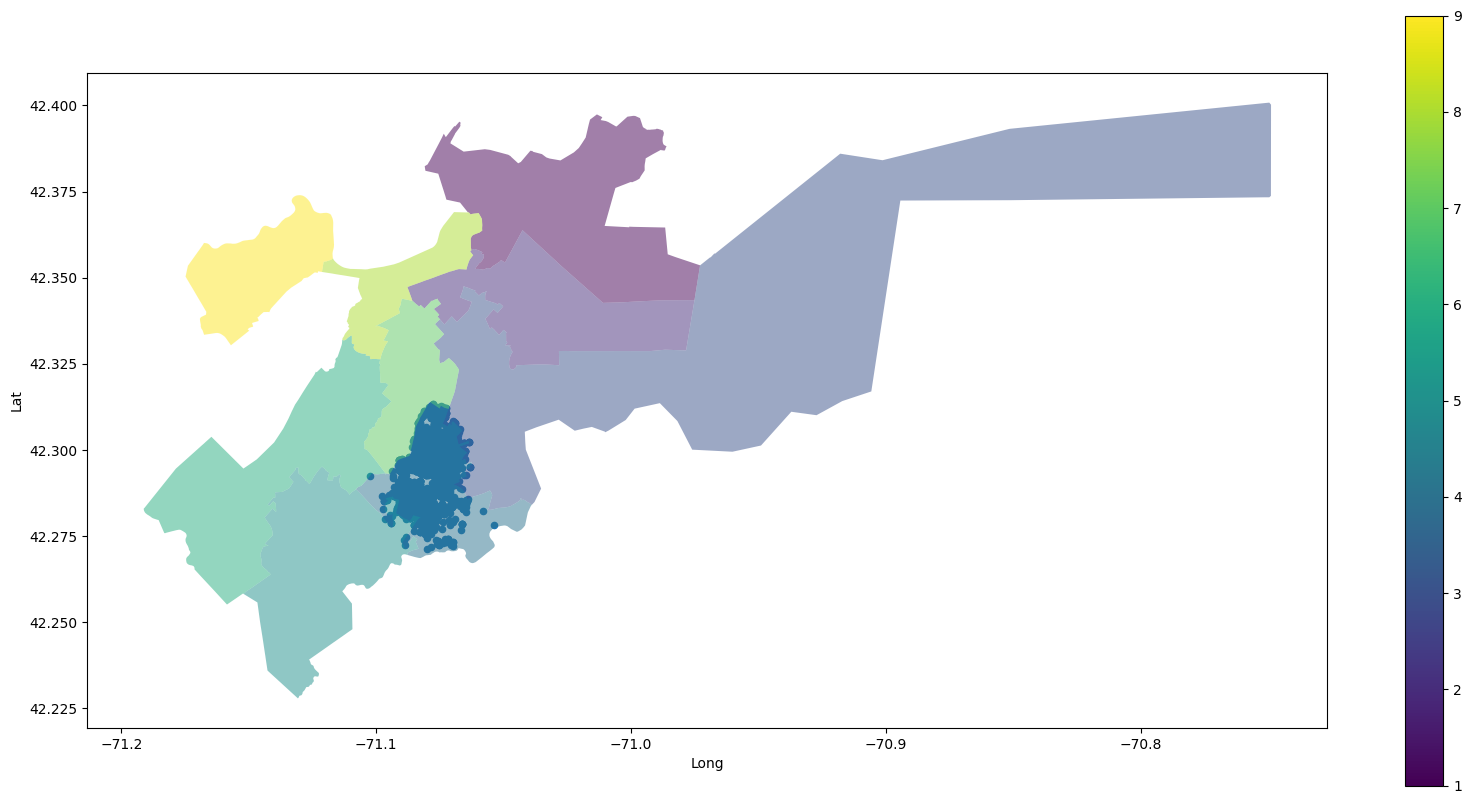

In [58]:
ax = shooting_incident_4.plot(x="Long", y="Lat", kind="scatter",
        figsize=(20, 10))
city_council.plot(ax = ax, column = 'DISTRICT', legend = True, figsize=(20, 10), alpha = 0.5)

<Axes: xlabel='Long', ylabel='Lat'>

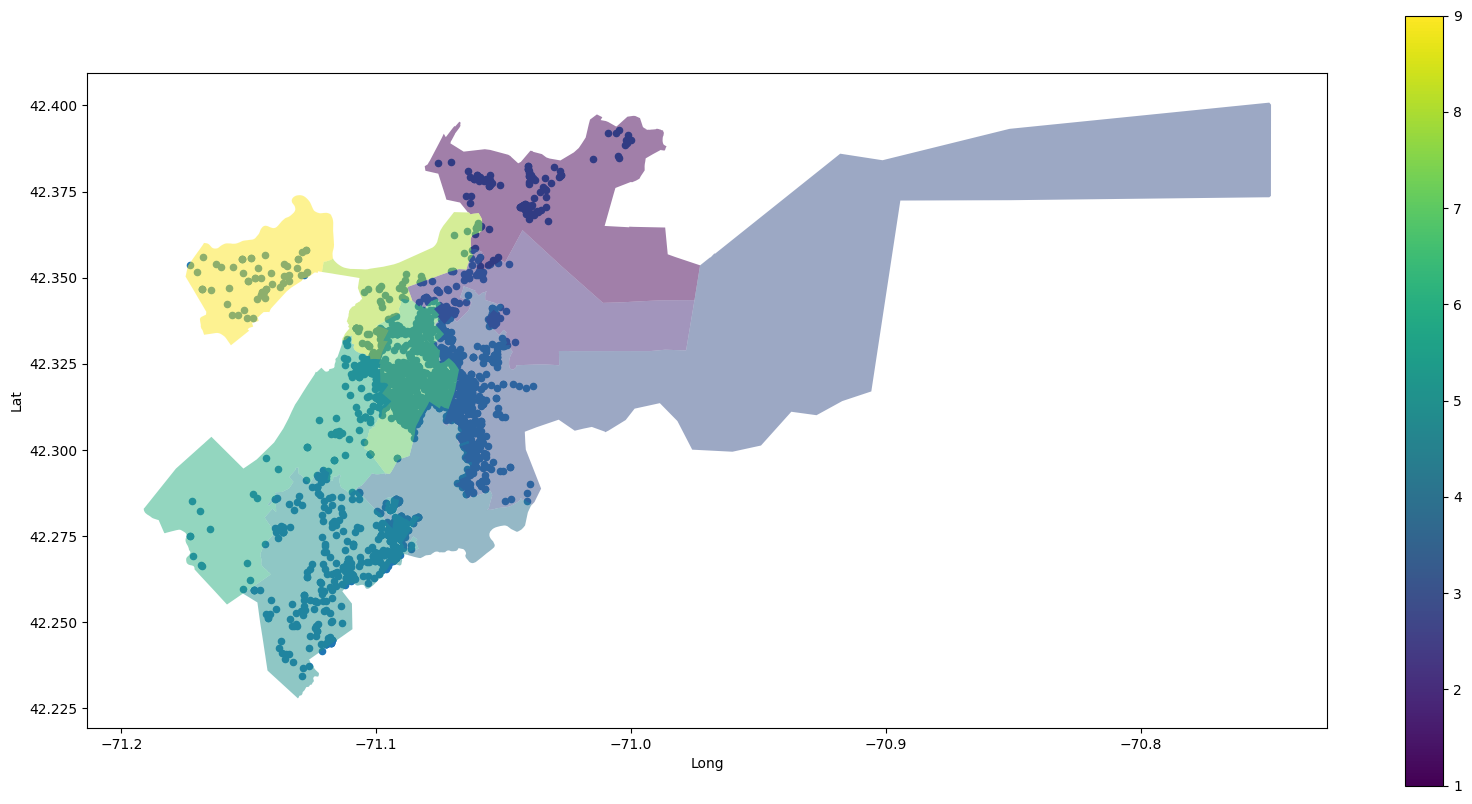

In [79]:
shootings_not_4 = shooting_incident[shooting_incident['district_4'] == False]

# Plot the scatter plot for all districts except District 4
ax = shootings_not_4.plot(x='Long', y='Lat', kind='scatter', figsize=(20, 10))

# Overlay the city council districts on the scatter plot
city_council.plot(ax=ax, column='DISTRICT', legend=True, figsize=(20, 10), alpha=0.5)

In [67]:
# Calculate the number of incidents in District 4

num_district_4 = len(shooting_incident_4)

# Calculate the total number of incidents in the city
num_city = len(shooting_incident)

# Calculate the rate of gun violence in District 4
rate_district_4 = num_district_4 / num_city

# Print the results
print('Number of incidents in District 4:', num_district_4)
print('Total number of incidents in the city:', num_city)
print('Rate of gun violence in District 4:', rate_district_4)

Number of incidents in District 4: 1289
Total number of incidents in the city: 3645
Rate of gun violence in District 4: 0.35363511659807956


What is the rate of gun violence in District 4?

the rate of gun violence in District 4 is 35.36%

How does this compare to the rest of the city?

we can see from the scatter graph above, district 4 is denser than the other area, so the rate of gun violence in District 4 is much higher than the overall rate of gun violence in the city.

Other analysis for the rest of data:

[Text(0.5, 1.0, 'Number of Incidents by Gender'),
 Text(0.5, 0, 'Gender'),
 Text(0, 0.5, 'Number of Incidents')]

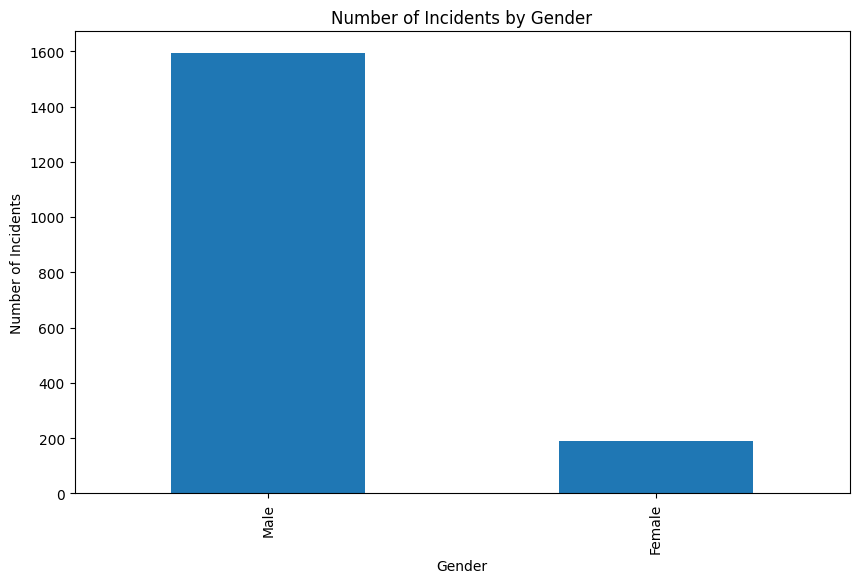

In [82]:
shootings = pd.read_csv('SHOOTINGS.csv')
shootings['victim_gender'].value_counts().plot(kind='bar',figsize=(10, 6)).set(title='Number of Incidents by Gender', xlabel='Gender', ylabel='Number of Incidents')


[Text(0.5, 1.0, 'Number of Incidents by Race'),
 Text(0.5, 0, 'Race'),
 Text(0, 0.5, 'Number of Incidents')]

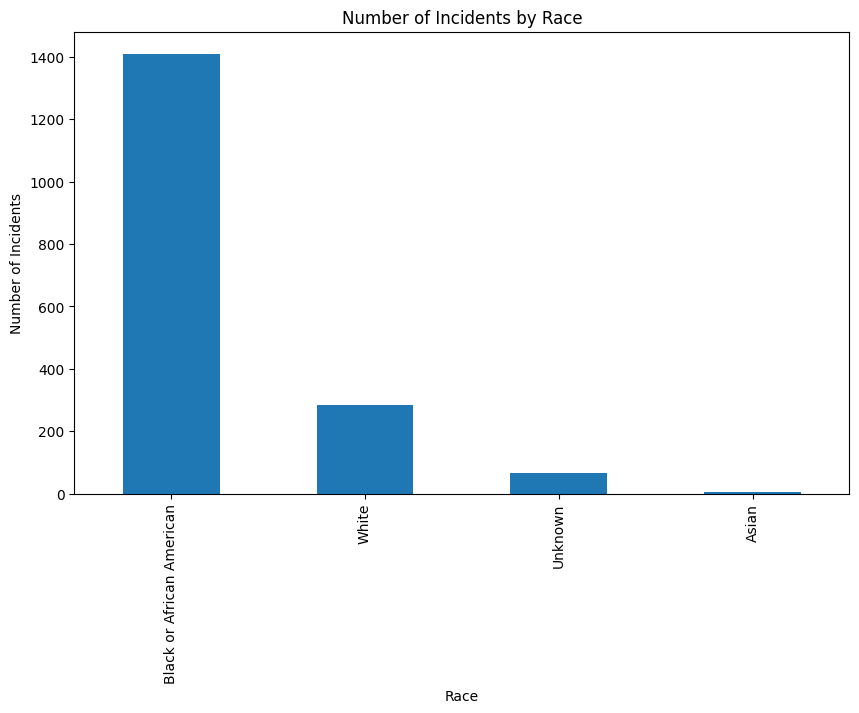

In [83]:
shootings['victim_race'].value_counts().plot(kind='bar',figsize=(10, 6)).set(title='Number of Incidents by Race', xlabel='Race', ylabel='Number of Incidents')


[Text(0.5, 1.0, 'Number of Incidents by Ethnicity'),
 Text(0.5, 0, 'Ethnicity'),
 Text(0, 0.5, 'Number of Incidents')]

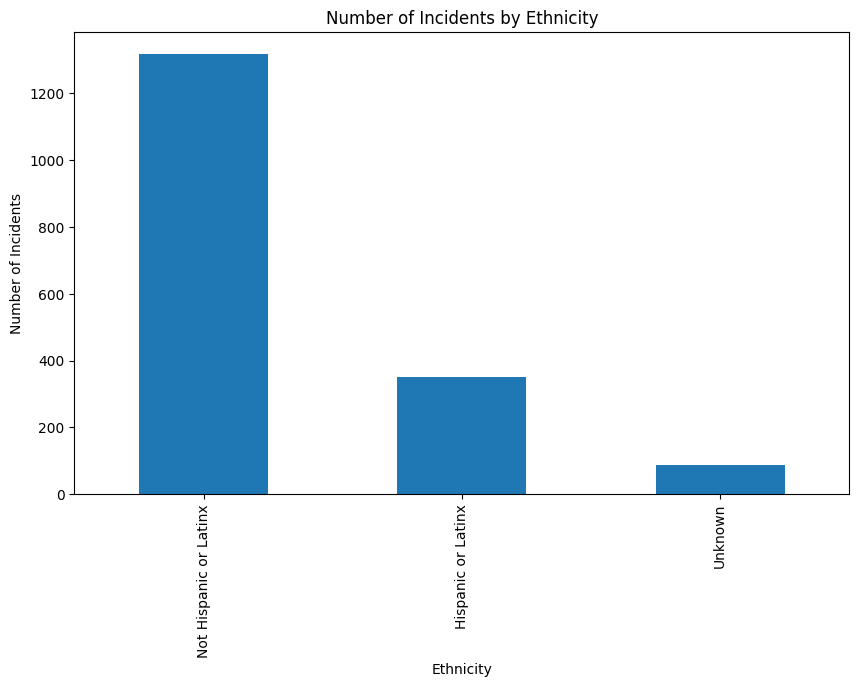

In [84]:
shootings['victim_ethnicity_NIBRS'].value_counts().plot(kind='bar',figsize=(10, 6)).set(title='Number of Incidents by Ethnicity', xlabel='Ethnicity', ylabel='Number of Incidents')


[Text(0.5, 1.0, 'Number of Incidents by Ethnicity'),
 Text(0.5, 0, 'Ethnicity'),
 Text(0, 0.5, 'Number of Incidents')]

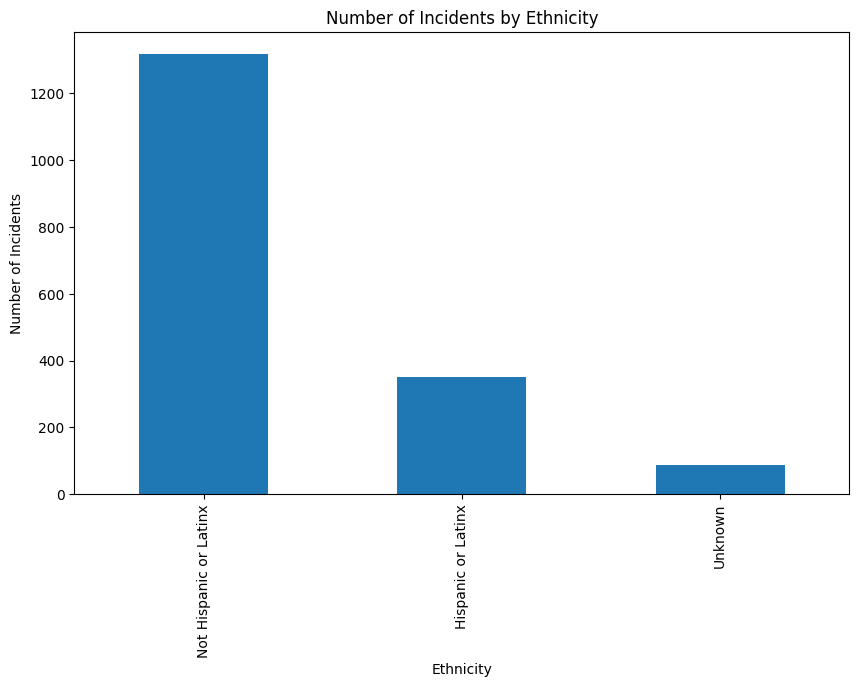

In [87]:
shootings['victim_ethnicity_NIBRS'].value_counts().plot(kind='bar',figsize=(10, 6)).set(title='Number of Incidents by Ethnicity', xlabel='Ethnicity', ylabel='Number of Incidents')


[Text(0.5, 1.0, 'Number of Incidents by District'),
 Text(0.5, 0, 'District'),
 Text(0, 0.5, 'Number of Incidents')]

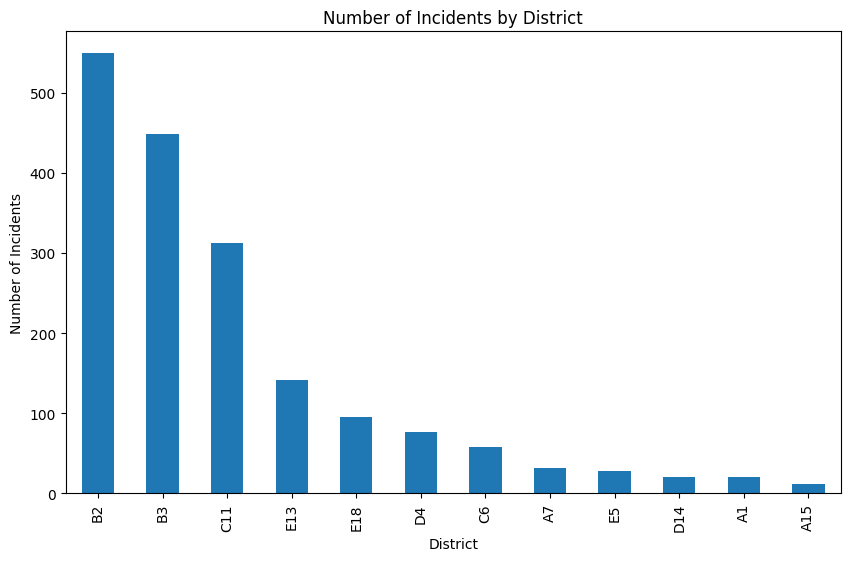

In [88]:
shootings['district'].value_counts().plot(kind='bar',figsize=(10, 6)).set(title='Number of Incidents by District', xlabel='District', ylabel='Number of Incidents')


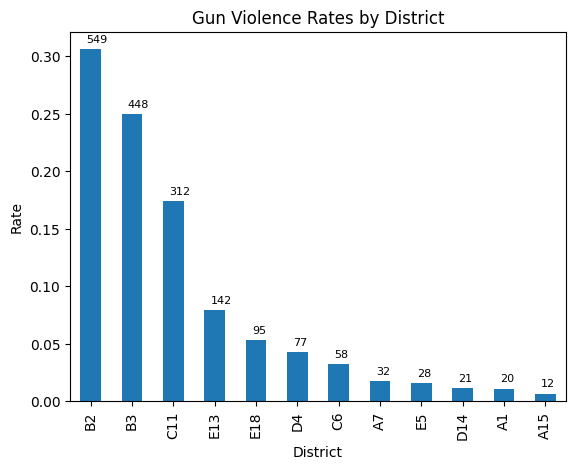

In [86]:
district_rates = shootings['district'].value_counts(normalize=True)

# Create a bar plot to compare the rates
district_rates.plot(kind='bar').set(title='Gun Violence Rates by District', xlabel='District', ylabel='Rate')

# Add text labels to the bars
for i, v in enumerate(district_rates):
    plt.text(i - 0.1, v + 0.006, str(round(v * len(shootings))), fontsize=8)